In [489]:
from datetime import datetime
import math
import numpy as np

import pandas as pd # Для загрузки данных из файла

from pandas import set_option # Для округления значений в таблице от .describe()
from pandas.plotting import scatter_matrix # Матрица диаграммы рассеяния

import matplotlib.pyplot as plt # Для визуализации

import seaborn as sns # График корреляционной матрицы

In [ ]:
df = pd.read_csv("data.csv", low_memory=False)
target_parameter = "correct"

In [491]:
# Анализ необработанных данных.
df.head()

participant_id        date         original_filename  trial_number  \
0        Jupiter  02.06.2025  02.06.2025 - Jupiter.txt             1   
1        Jupiter  02.06.2025  02.06.2025 - Jupiter.txt             2   
2        Jupiter  02.06.2025  02.06.2025 - Jupiter.txt             3   
3        Jupiter  02.06.2025  02.06.2025 - Jupiter.txt             4   
4        Jupiter  02.06.2025  02.06.2025 - Jupiter.txt             5   

  reaction_time  correct correct_position chosen_position  prompt  \
0          1029        0              2th             3th     NaN   
1           579        1              2th             2th     NaN   
2           688        0              3th             4th     NaN   
3           578        0              4th             2th     NaN   
4           848        1              4th             4th     NaN   

   sample_name  ...                                          file_path  \
0          NaN  ...  /content/drive/MyDrive/Pavlov/Макаки учатся/Ex...   
1          NaN  ...  /content/drive/MyDrive/Pavlov/Макаки учатся/Ex...   
2          NaN  ...  /content/drive/MyDrive/Pavlov/Макаки учатся/Ex...   
3          NaN  ...  /content/drive/MyDrive/Pavlov/Макаки учатся/Ex...   
4          NaN  ...  /content/drive/MyDrive/Pavlov/Макаки учатся/Ex...   

  stimuli_quantity colored nut_quantity juice_quantity             datetime  \
0              4.0     NaN          1.0            0.0  02.06.2025 11:59:45   
1              4.0     NaN          1.0            0.0  02.06.2025 11:59:45   
2              4.0     NaN          1.0            0.0  02.06.2025 11:59:45   
3              4.0     NaN          1.0            0.0  02.06.2025 11:59:45   
4              4.0     NaN          1.0            0.0  02.06.2025 11:59:45   

  mean_reaction_time percent_correct omission_percent experiment_duration  
0              980.0            35.0              4.0       9 min, 35 sec  
1              980.0            35.0              4.0       9 min, 35 sec  
2              980.0            35.0              4.0       9 min, 35 sec  
3              980.0            35.0              4.0       9 min, 35 sec  
4              980.0            35.0              4.0       9 min, 35 sec  

[5 rows x 31 columns]

In [492]:
# Определение размеров набора данных.
df.shape

(6159, 31)

In [493]:
# Изучение типов данных атрибутов.
df.dtypes

participant_id                object
date                          object
original_filename             object
trial_number                   int64
reaction_time                 object
correct                        int64
correct_position              object
chosen_position               object
prompt                       float64
sample_name                  float64
file_1_name                   object
file_2_name                   object
file_3_name                   object
file_4_name                   object
colour_1_stimul               object
colour_2_stimul               object
colour_3_stimul               object
colour_4_stimul               object
date_parsed                   object
participant_id_original       object
participant_id_normalized     object
file_path                     object
stimuli_quantity             float64
colored                       object
nut_quantity                 float64
juice_quantity               float64
datetime                      object
m

In [494]:
# Обобщение описательной статистики и выявление взаимосвязей между переменными в наборе данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   participant_id             6159 non-null   object 
 1   date                       6159 non-null   object 
 2   original_filename          6159 non-null   object 
 3   trial_number               6159 non-null   int64  
 4   reaction_time              6159 non-null   object 
 5   correct                    6159 non-null   int64  
 6   correct_position           6159 non-null   object 
 7   chosen_position            6159 non-null   object 
 8   prompt                     0 non-null      float64
 9   sample_name                0 non-null      float64
 10  file_1_name                6159 non-null   object 
 11  file_2_name                6159 non-null   object 
 12  file_3_name                6139 non-null   object 
 13  file_4_name                6139 non-null   objec

In [495]:
df_base = df.copy()

df["correct_position"] = pd.factorize(df['correct_position'])[0] + 1
df["chosen_position"] = pd.factorize(df['chosen_position'])[0] + 1
df["file_1_name"] = pd.factorize(df['file_1_name'])[0] + 1
df["file_2_name"] = pd.factorize(df['file_2_name'])[0] + 1
df["file_3_name"] = pd.factorize(df['file_3_name'])[0] + 1
df["file_4_name"] = pd.factorize(df['file_4_name'])[0] + 1
df["colored"] = pd.factorize(df['colored'])[0] + 1
# df["sample_name"] = pd.factorize(df['sample_name'])[0] + 1
df["colour_1_stimul"] = pd.factorize(df['colour_1_stimul'])[0] + 1
df["colour_2_stimul"] = pd.factorize(df['colour_2_stimul'])[0] + 1
df["colour_3_stimul"] = pd.factorize(df['colour_3_stimul'])[0] + 1
df["colour_4_stimul"] = pd.factorize(df['colour_3_stimul'])[0] + 1
df["participant_id"] = pd.factorize(df['participant_id'])[0] + 1

df["reaction_time"] = df["reaction_time"].replace("No answer", -1).astype(float)



df = df.drop(columns=["original_filename"], errors='ignore')
df = df.drop(columns=["participant_id_original"], errors='ignore')
df = df.drop(columns=["participant_id_normalized"], errors='ignore')
df = df.drop(columns=["file_path"], errors='ignore')
df = df.drop(columns=["date_parsed"], errors='ignore')
df = df.drop(columns=["date"], errors='ignore')
df = df.drop(columns=["file_1_name"], errors='ignore')
df = df.drop(columns=["file_2_name"], errors='ignore')
df = df.drop(columns=["file_3_name"], errors='ignore')
df = df.drop(columns=["file_4_name"], errors='ignore')

df = df.drop(columns=["colored"], errors='ignore')

df = df.drop(columns=["colour_1_stimul"], errors='ignore')
df = df.drop(columns=["colour_2_stimul"], errors='ignore')
df = df.drop(columns=["colour_3_stimul"], errors='ignore')
df = df.drop(columns=["colour_4_stimul"], errors='ignore')

df = df.drop(columns=["prompt"], errors='ignore')
df = df.drop(columns=["sample_name"], errors='ignore')

df = df.drop(columns=["nut_quantity"], errors='ignore')
df = df.drop(columns=["juice_quantity"], errors='ignore')

df = df.drop(columns=["stimuli_quantity"], errors='ignore')

In [496]:
days = []
months = []
years = []
minutes = []
seconds = []
for d in df['datetime']:
  dt = datetime.strptime(d, "%d.%m.%Y %M:%S:%f")
  days.append(dt.day)
  months.append(dt.month)
  years.append(dt.year)
  minutes.append(dt.minute)
  seconds.append(dt.second)

# df['seconds'] = seconds
# df['minutes'] = minutes
# df['day'] = days
# df['month'] = months
# df['year'] = years
df = df.drop(columns=["datetime"], errors='ignore')

In [497]:
import re

def duration_to_seconds(duration):
    if pd.isnull(duration):
        return None
    match = re.match(r"(\d+)\s*min,\s*(\d+)\s*sec", str(duration))
    if match:
        minutes = int(match.group(1))
        seconds = int(match.group(2))
        return minutes * 60 + seconds
    return None

df["experiment_duration_seconds"] = df["experiment_duration"].apply(duration_to_seconds)
df = df.drop(columns=["experiment_duration"], errors='ignore')

In [498]:
# Сводка по числовым атрибутам
set_option('display.precision', 3)
df.describe()

participant_id  trial_number  reaction_time   correct  \
count        6159.000      6159.000       6159.000  6159.000   
mean            2.064        29.101       1141.928     0.276   
std             0.872        19.473        705.343     0.447   
min             1.000         1.000         -1.000     0.000   
25%             1.000        14.000        882.000     0.000   
50%             2.000        27.000       1127.000     0.000   
75%             3.000        41.000       1419.000     1.000   
max             3.000       100.000      19609.000     1.000   

       correct_position  chosen_position  mean_reaction_time  percent_correct  \
count          6159.000         6159.000            6159.000         6159.000   
mean              2.509            2.347            1287.070           30.315   
std               1.123            1.310             220.336           11.686   
min               1.000            1.000             668.000           16.000   
25%               1.000            1.000            1133.000           22.000   
50%               3.000            2.000            1345.000           26.000   
75%               4.000            3.000            1422.000           35.000   
max               4.000            5.000            1699.000           61.000   

       omission_percent  experiment_duration_seconds  
count          6159.000                     6159.000  
mean             11.161                      622.393  
std              13.099                      114.759  
min               0.000                      198.000  
25%               2.000                      576.000  
50%               6.000                      592.000  
75%              14.000                      620.000  
max              70.000                     1290.000

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   participant_id               6159 non-null   int64  
 1   trial_number                 6159 non-null   int64  
 2   reaction_time                6159 non-null   float64
 3   correct                      6159 non-null   int64  
 4   correct_position             6159 non-null   int64  
 5   chosen_position              6159 non-null   int64  
 6   mean_reaction_time           6159 non-null   float64
 7   percent_correct              6159 non-null   float64
 8   omission_percent             6159 non-null   float64
 9   experiment_duration_seconds  6159 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 481.3 KB


In [500]:
df_base = df_base["chosen_position"].astype("category")
print(df_base)

0       3th
1       2th
2       4th
3       2th
4       4th
       ... 
6154    2th
6155    4th
6156    3th
6157    4th
6158    2th
Name: chosen_position, Length: 6159, dtype: category
Categories (5, object): ['1th', '2th', '3th', '4th', 'No decision']


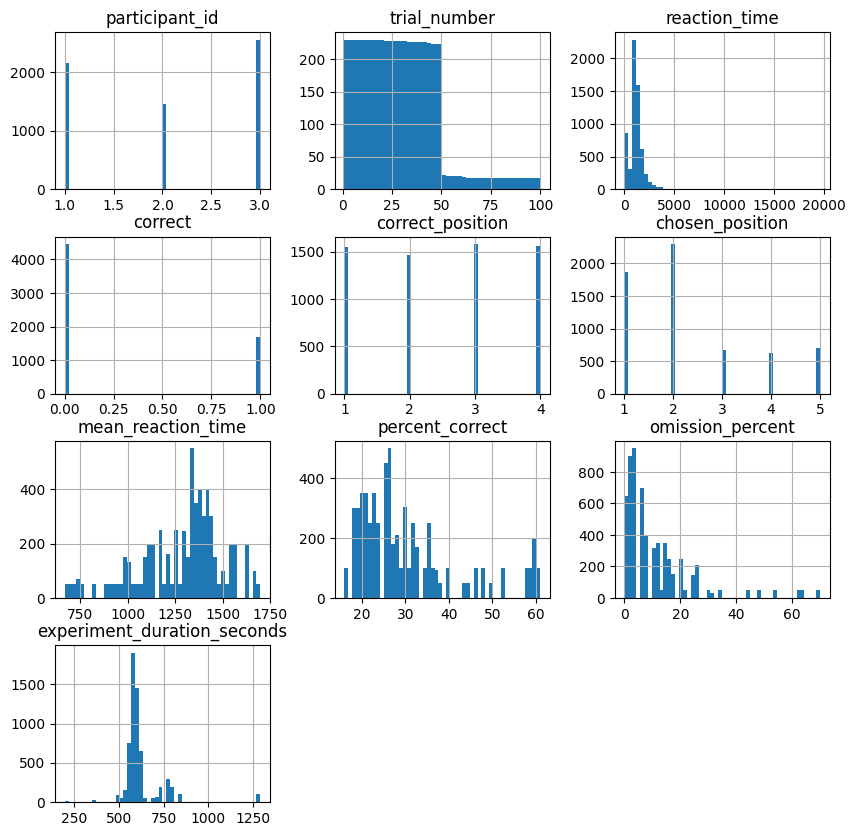

In [501]:
df.hist(bins=50, figsize=(10,10))
plt.show()

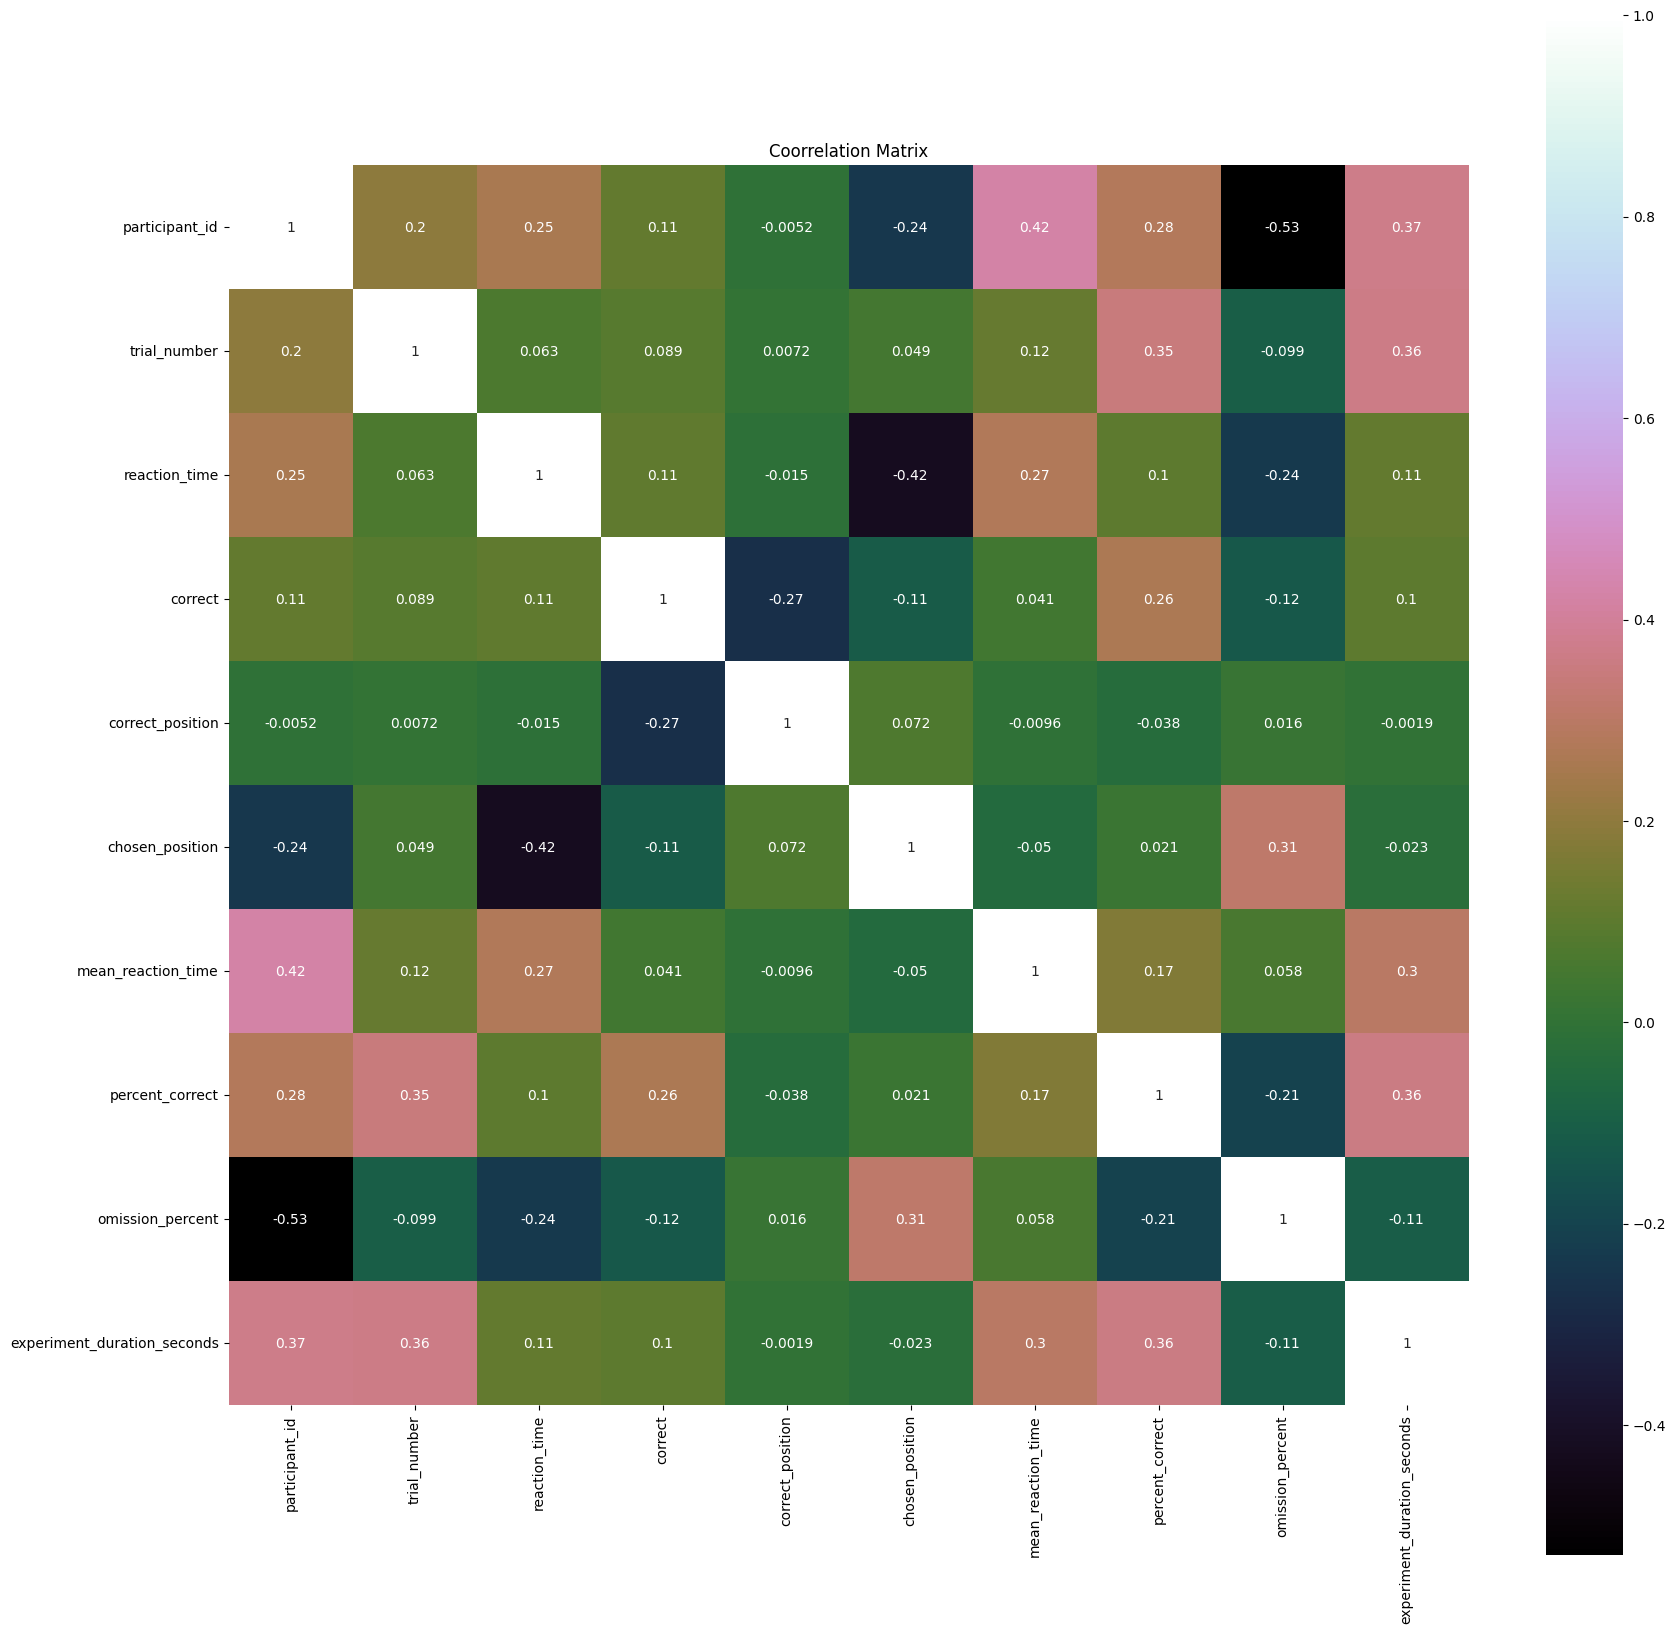

In [502]:
correlation = df.corr()
plt.figure(figsize=(20,20))
plt.title('Coorrelation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

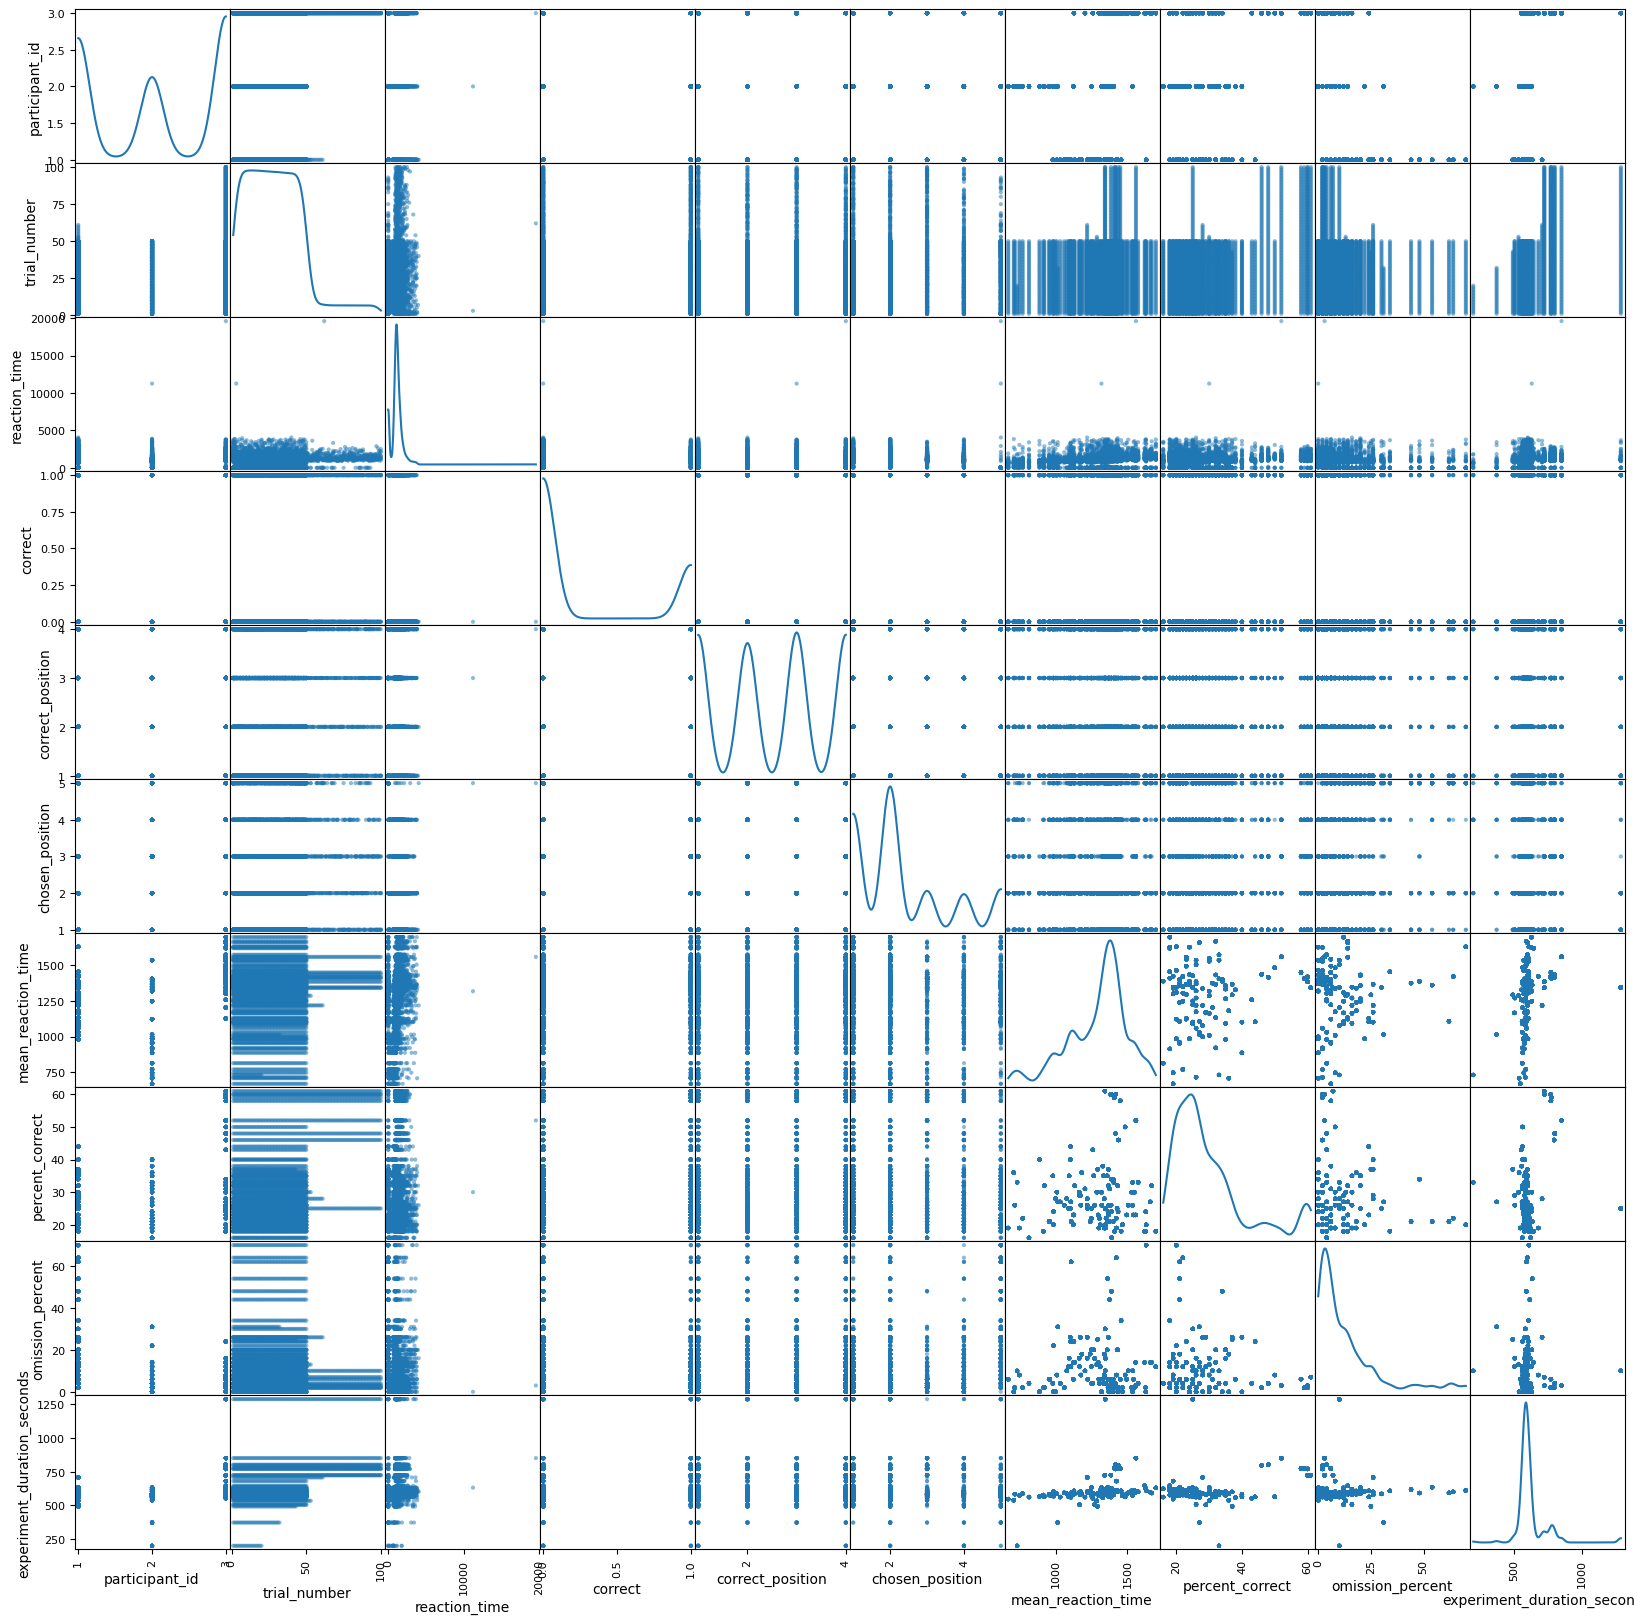

In [503]:
scatter_matrix(df, diagonal='kde', figsize=(20,20))
plt.show()

In [504]:
corr_matrix = df.corr()
corr_matrix

participant_id  trial_number  reaction_time  \
participant_id                        1.000         0.199          0.255   
trial_number                          0.199         1.000          0.063   
reaction_time                         0.255         0.063          1.000   
correct                               0.113         0.089          0.108   
correct_position                     -0.005         0.007         -0.015   
chosen_position                      -0.241         0.049         -0.423   
mean_reaction_time                    0.423         0.120          0.272   
percent_correct                       0.282         0.349          0.104   
omission_percent                     -0.529        -0.099         -0.235   
experiment_duration_seconds           0.368         0.363          0.114   

                             correct  correct_position  chosen_position  \
participant_id                 0.113            -0.005           -0.241   
trial_number                   0.089             0.007            0.049   
reaction_time                  0.108            -0.015           -0.423   
correct                        1.000            -0.271           -0.113   
correct_position              -0.271             1.000            0.072   
chosen_position               -0.113             0.072            1.000   
mean_reaction_time             0.041            -0.010           -0.050   
percent_correct                0.261            -0.038            0.021   
omission_percent              -0.123             0.016            0.311   
experiment_duration_seconds    0.101            -0.002           -0.023   

                             mean_reaction_time  percent_correct  \
participant_id                            0.423            0.282   
trial_number                              0.120            0.349   
reaction_time                             0.272            0.104   
correct                                   0.041            0.261   
correct_position                         -0.010           -0.038   
chosen_position                          -0.050            0.021   
mean_reaction_time                        1.000            0.170   
percent_correct                           0.170            1.000   
omission_percent                          0.058           -0.206   
experiment_duration_seconds               0.298            0.358   

                             omission_percent  experiment_duration_seconds  
participant_id                         -0.529                        0.368  
trial_number                           -0.099                        0.363  
reaction_time                          -0.235                        0.114  
correct                                -0.123                        0.101  
correct_position                        0.016                       -0.002  
chosen_position                         0.311                       -0.023  
mean_reaction_time                      0.058                        0.298  
percent_correct                        -0.206                        0.358  
omission_percent                        1.000                       -0.110  
experiment_duration_seconds            -0.110                        1.000

In [505]:
corr_matrix[target_parameter].sort_values(ascending=False)

correct                        1.000
percent_correct                0.261
participant_id                 0.113
reaction_time                  0.108
experiment_duration_seconds    0.101
trial_number                   0.089
mean_reaction_time             0.041
chosen_position               -0.113
omission_percent              -0.123
correct_position              -0.271
Name: correct, dtype: float64